## Gather the data

In [1]:
import numpy as np
import pickle
from simtk.openmm import unit
from openmmtools.constants import kB
import pandas as pd

import matplotlib.pyplot as plt
KT_KCALMOL = kB * 300 * unit.kelvin / unit.kilocalories_per_mole

In [2]:
def compute_ddg(apo_dg, complex_dg):
    return complex_dg * KT_KCALMOL - apo_dg * KT_KCALMOL

def compute_error(apo_ddg, complex_ddg):
    return (apo_ddg**2 + complex_ddg**2)**0.5 * KT_KCALMOL

In [3]:
# Retrieve free energies

main_dir_og = 47
main_dir_og2 = 45
main_dir_rest = 52
sub_dirs = list(range(0, 4)) + list(range(5, 12)) + list(range(13, 17)) + list(range(18, 28))

d_results = {}
for sub_dir in sub_dirs:
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            if sub_dir in [19, 21]:
                replicate = 1
            else:
                replicate = 0
        else:
            length = 10
            main_dir = main_dir_og
            replicate = 1
            
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results

d_mapping = {4: 11, 12: 10, 17: 9}
for sub_dir in d_mapping.keys():
    d_results[sub_dir] = {}
    for phase in ['apo', 'complex']:
        if phase == "complex":
            length = 50
            main_dir = main_dir_rest
            sub_dir_final = sub_dir
            replicate = 0
        else:
            length = 10
            main_dir = main_dir_og2
            sub_dir_final = d_mapping[sub_dir]
            if sub_dir_final == 11:
                replicate = 0
            else:
                replicate = 1
        
        with open(f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/{sub_dir_final}/replicate_{replicate}/{phase}_free_energy_bootstrapped_{length}ns.pickle", "rb") as f:
            results = pickle.load(f)
            d_results[sub_dir][phase] = results
        

In [4]:
# Format the data appropriately for cinnabar

titles = ["Y29F", "Y29A",  "W38F", "T42A", "W44F", "E76A", "E80A", "D35A", "D39A", "K27A", "R59A", "R83Q", "R87A", "H102A", "F29Y", "A29Y",  "F38W", "A42T", "F44W", "A76E", "A80E", "A35D", "A39D", "A27K", "A59R", "Q83R", "A87R", "A102H"]

to_plot = []

for sub_dir in range(28):
    ddg = compute_ddg(d_results[sub_dir]['apo']["Deltaf"][0, -1], d_results[sub_dir]['complex']["Deltaf"][0, -1])
    dddg = compute_error(d_results[sub_dir]['apo']["dDeltaf"][0, -1], d_results[sub_dir]['complex']["dDeltaf"][0, -1])
    if sub_dir in range(14):
        to_plot.append([titles[sub_dir], ddg, dddg*2, 0])
    else:
        to_plot.append(["-(" + titles[sub_dir] + ")", ddg * -1, dddg*2, 0])


In [5]:
to_plot

[['Y29F', 0.837734436394328, 0.7013987349366633, 0],
 ['Y29A', 1.8498112959831658, 0.8488566977135539, 0],
 ['W38F', 0.053753372945006817, 0.9635271417908515, 0],
 ['T42A', 0.8924352772691933, 0.5153257852601384, 0],
 ['W44F', 0.42709806720309884, 0.9019485744191662, 0],
 ['E76A', 0.8007754184594734, 1.4480394737620523, 0],
 ['E80A', 0.10110859365214786, 1.4577355980951345, 0],
 ['D35A', 1.176679047197878, 1.1404444826131526, 0],
 ['D39A', 6.462788148992341, 1.1377245018157507, 0],
 ['K27A', 2.795742289639051, 1.3687599445871335, 0],
 ['R59A', 3.75017338663973, 1.5205352417583822, 0],
 ['R83Q', 1.995752829087074, 1.1595673679114653, 0],
 ['R87A', 6.997693978380269, 1.1952217637595801, 0],
 ['H102A', 6.842373553462718, 0.5799253695382593, 0],
 ['-(F29Y)', 0.8846591017023435, 0.9471178849218759, 0],
 ['-(A29Y)', 1.3333941144661665, 0.8779518390710238, 0],
 ['-(F38W)', 0.8126016859941994, 0.9457649079250393, 0],
 ['-(A42T)', 0.6312937075481955, 0.5159833311762065, 0],
 ['-(F44W)', 0.69799

In [6]:
# Assemble experimental values
experiment = [-0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1, -0.1, 3.4, 1.6, 1.8, 0, 1.4, 0.5, 4.5, 7.7, 5.4, 5.2, 5.4, 5.5, 6.1]


## Plot

In [7]:
import numpy as np

import matplotlib.pylab as plt


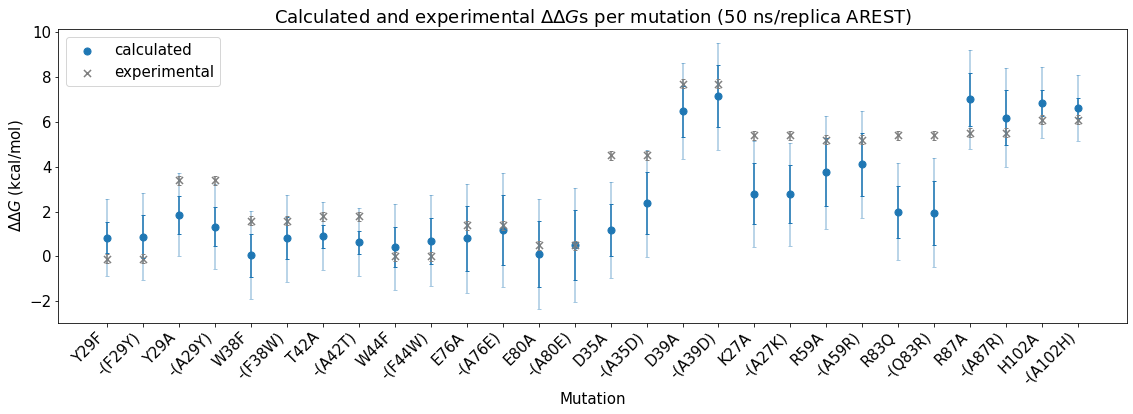

<Figure size 432x288 with 0 Axes>

In [9]:
# Set figure size
fig, axes = plt.subplots(nrows=1, ncols=1, sharex='col', figsize=(16, 6))

# Set font size
plt.rc('font', size=15) 

# Plot
mutations = []
to_plot_free_energies = []
to_plot_uncertainties = []
experiment_reordered = []
for i in range(14):
    mutations.append(to_plot[i][0])
    mutations.append(to_plot[i+14][0])
    to_plot_free_energies.append(to_plot[i][1])
    to_plot_free_energies.append(to_plot[i+14][1])
    to_plot_uncertainties.append(to_plot[i][2])
    to_plot_uncertainties.append(to_plot[i+14][2])
    experiment_reordered.append(experiment[i])
    experiment_reordered.append(experiment[i+14])
to_plot_uncertainties = np.array(to_plot_uncertainties)
plt.scatter(mutations, to_plot_free_energies, s=50, label='calculated')
plt.errorbar(mutations, to_plot_free_energies, yerr=to_plot_uncertainties, capsize=2, fmt='none')
plt.errorbar(mutations, to_plot_free_energies, yerr=to_plot_uncertainties + 1, alpha=0.4, capsize=2, fmt='none')
plt.scatter(mutations, experiment_reordered, s=50, marker='x', color='gray', label='experimental')
plt.errorbar(mutations, experiment_reordered, yerr=2*np.array([0.1]*28), color='gray', capsize=2, fmt='none')

# Set title
DDG = r"$\Delta\Delta G$"
plt.title(f"Calculated and experimental {DDG}s per mutation (50 ns/replica AREST)")

# Show legend
plt.legend()

# Set axis labels
plt.xlabel("Mutation")
plt.ylabel(r"$\Delta\Delta G$ (kcal/mol)")

# Set x ticks
plt.xticks(rotation=45, ha='right')

# Ensure x-axis labels are not cut off
plt.tight_layout()

# Save plot as pdf
main_dir = 52
save_path = f"/data/chodera/zhangi/perses_benchmark/repex/perses-bnbs-paper-fourth-attempt/{main_dir}/calculated_vs_experiment_50ns.pdf"
plt.savefig(save_path, dpi=500)
plt.show()
plt.clf()